<a href="https://colab.research.google.com/github/liyanonline/BIPython/blob/main/Chapter%2003%20-%20Data%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Data Visualization

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition)
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

Pandas provides a number of basic plotting capabilities. Matplotlib however gives you more control over details of the visualisation. The Pandas plot methods return an axes object, which can also be used to modify the visualisation using basic matplotlib commands.

## Import required packages

In [39]:
!pip install dmba

import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline


## Table 3.2

In [40]:
housing_df = dmba.load_data('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
print(housing_df.head(9))
housing_df.head(9)

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   

   LSTAT  MEDV  CAT_MEDV  
0   4.98  24.0         0  
1   9.14  21.6         0  
2   4.03  34.7         1  
3   2.94  33.4         1  
4   5.33  36.2         1  
5   5.21  28.7         0  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


## Figure 3.1
Load the Amtrak data and convert them to be suitable for time series analysis

In [41]:
Amtrak_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

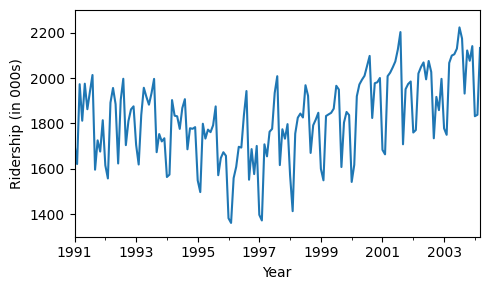

In [42]:
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[5, 3])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()
plt.show()

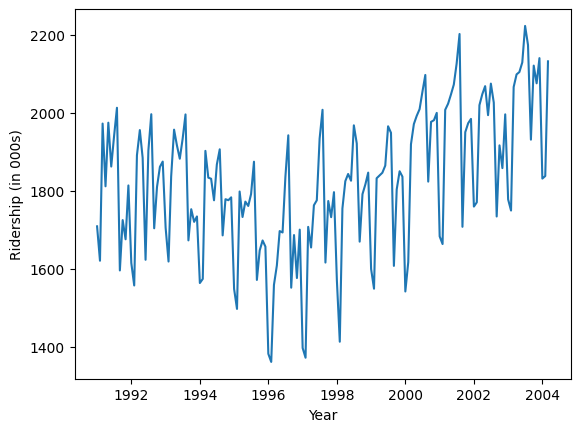

In [43]:
# alternative plot with matplotlib
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label
plt.show()

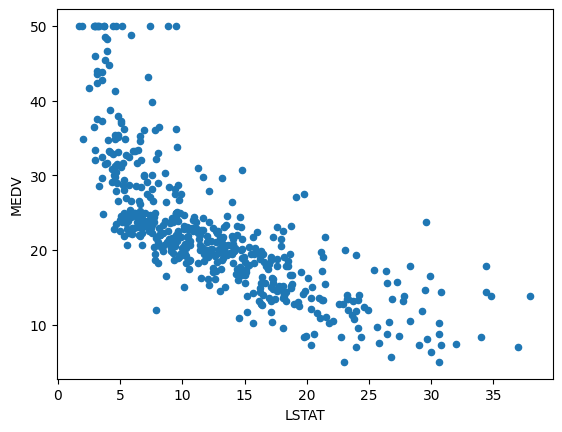

In [44]:
housing_df = dmba.load_data('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)
plt.show()

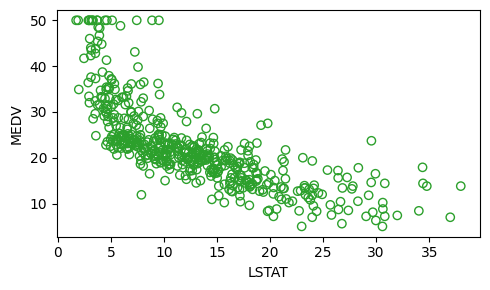

In [45]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

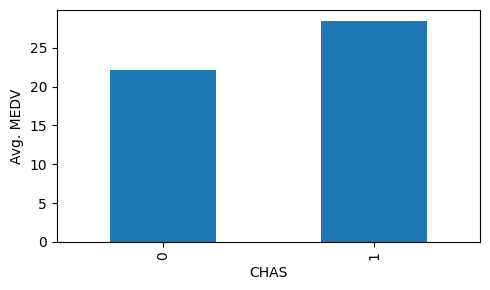

In [46]:
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

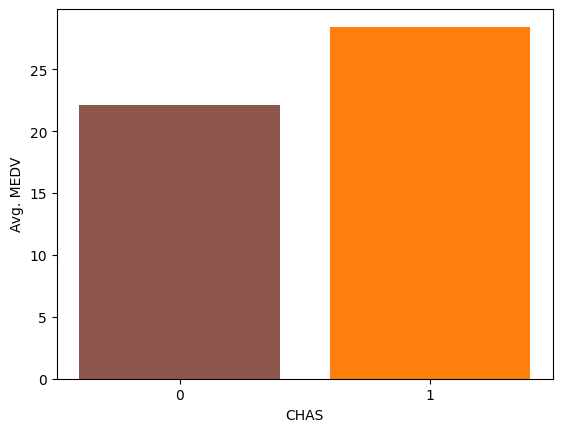

In [47]:
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')
plt.show()

In [48]:
housing_df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


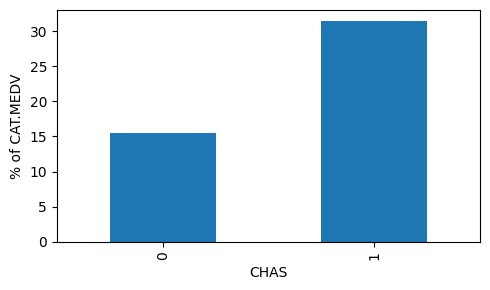

In [49]:
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of CAT.MEDV')

plt.tight_layout()
plt.show()

Text(0, 0.5, '% of CAT.MEDV')

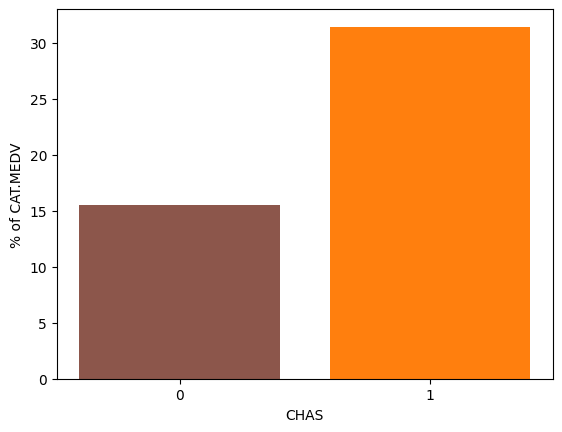

In [50]:
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('% of CAT.MEDV')

## Figure 3.2
Histogram of MEDV

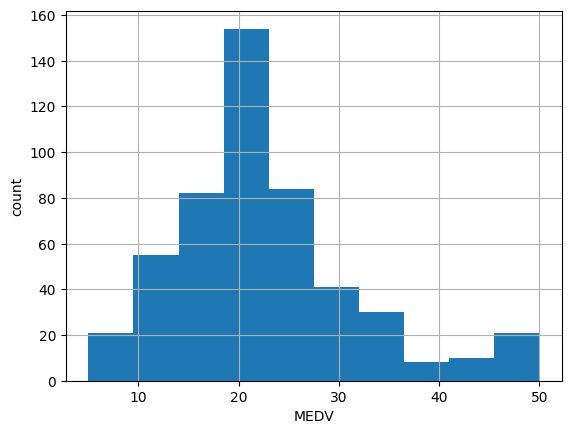

In [51]:
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

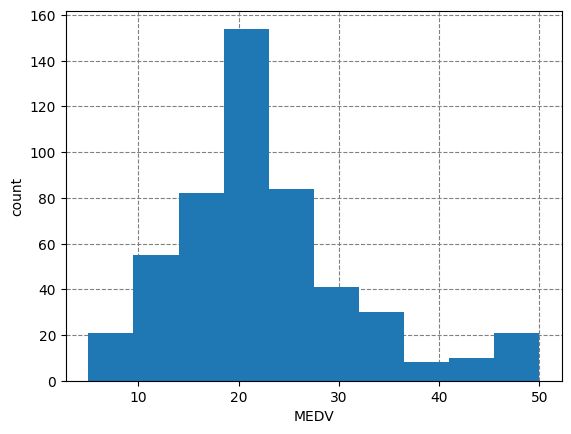

In [52]:
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()

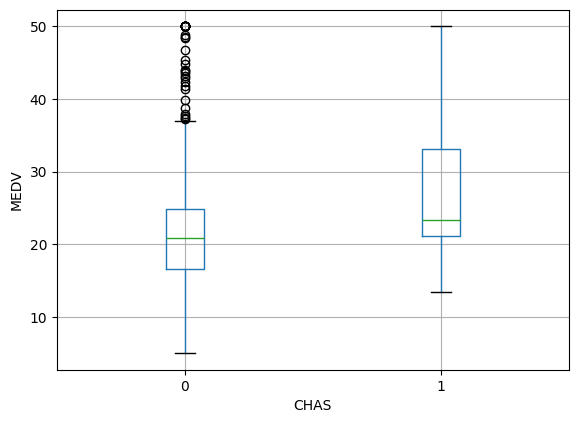

In [53]:
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

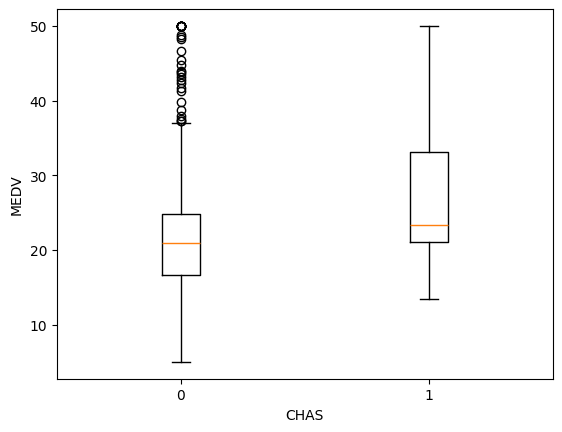

In [54]:
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2])
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

## Figure 3.3
Side by side boxplots

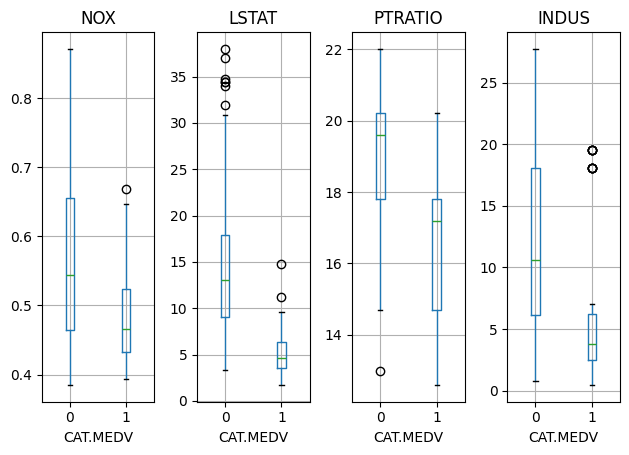

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

## Figure 3.4

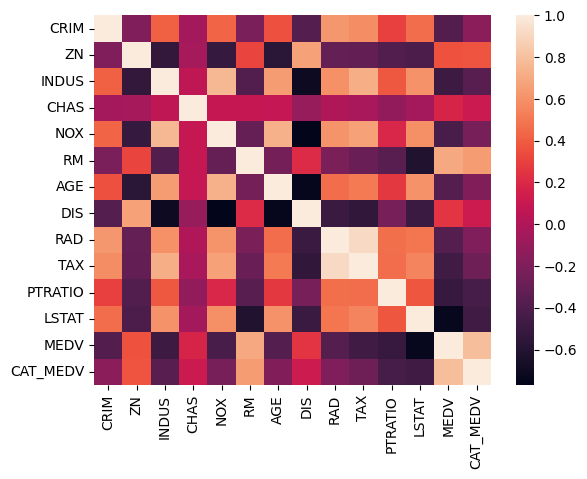

In [56]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

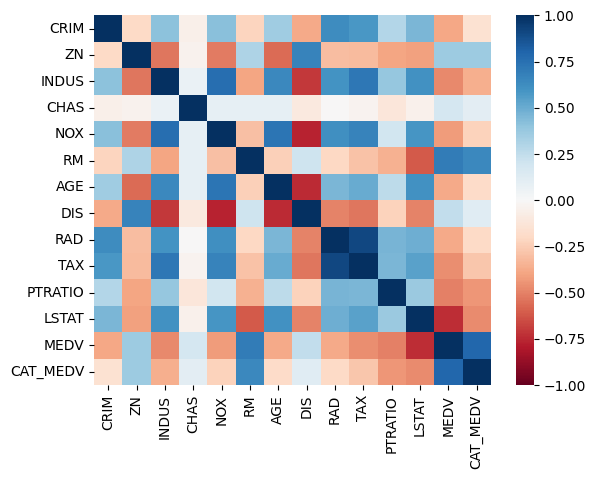

In [57]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

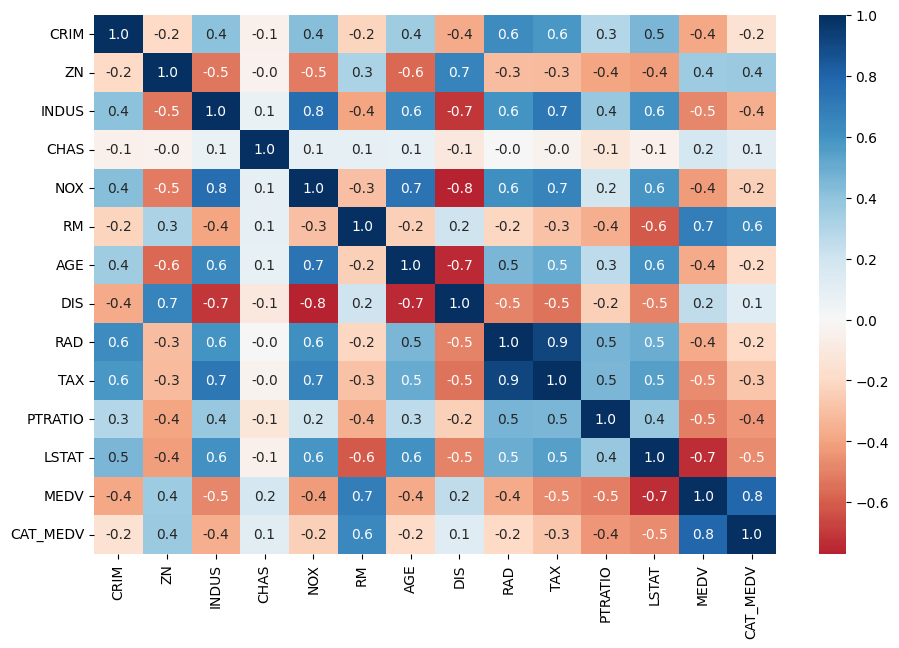

In [58]:
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

## Figure 3.5
A heatmap can also be used to visualize missing values. Here, we use a sample of the NYPD Motor Vehicle Collisions Dataset. (https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)

In [59]:
# df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')
# df = df.sample(1000)
# # df.head()
# df.to_csv('NYPD_Motor_Vehicle_Collisions_1000.csv', index=False)

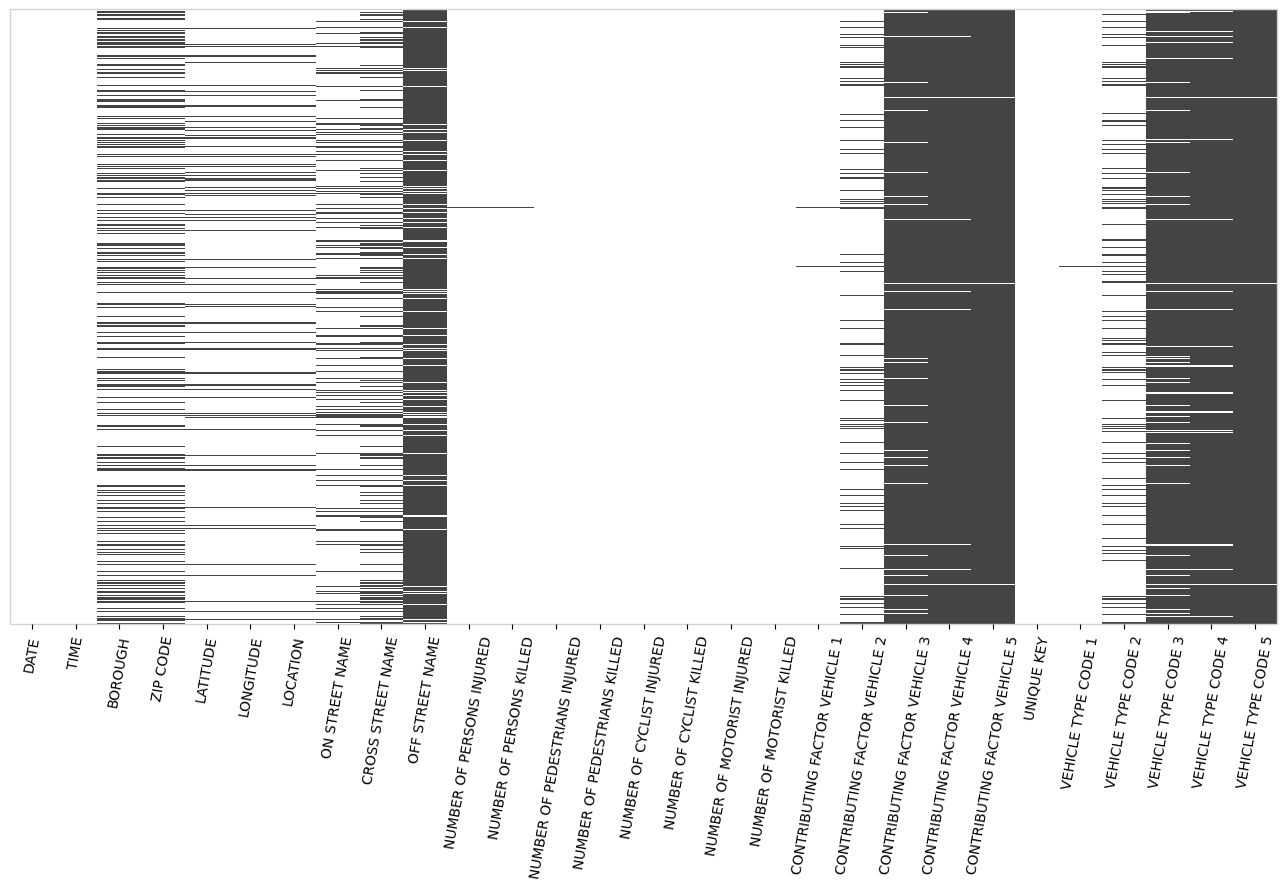

In [60]:
df = dmba.load_data('NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE'])

# Given a dataframe df create a copy of the array that is 0 if a field contains a value
# and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [61]:
# # Create a dataframe with missing values
# np.random.seed(12345)
# df = pd.DataFrame(np.random.randint(50, size=(100, 10)))
# df.where(df!=max(df), np.nan, inplace=True)

# # Given a dataframe df create a copy of the array that is 0 if a field contains a value and 1 for NaN
# naInfo = np.zeros(df.shape)
# naInfo[df.isna().values] = 1
# ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False)

# plt.show()

## Figure 3.6

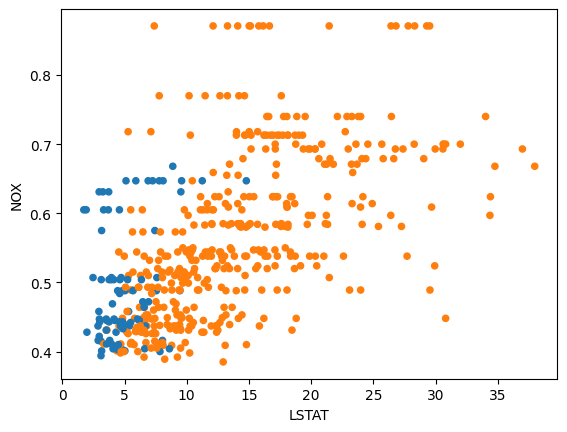

In [62]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX',
                        c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])
plt.show()

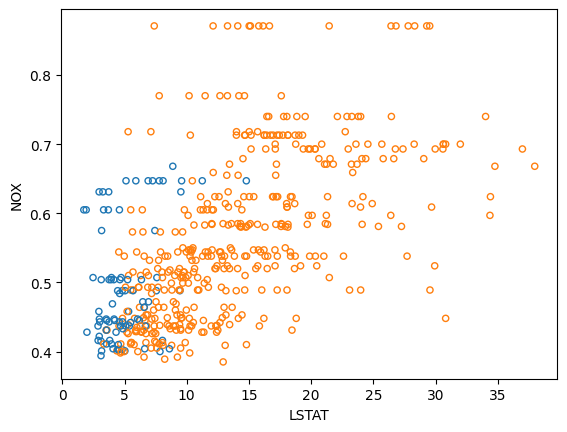

In [63]:
# Change the rendering of the points to open circles by controlling the color
housing_df.plot.scatter(x='LSTAT', y='NOX', color='none',
                        edgecolor=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])
plt.show()

If the data points for `CAT_MEDV` of 1 should be emphasized, it's useful to draw them separately.

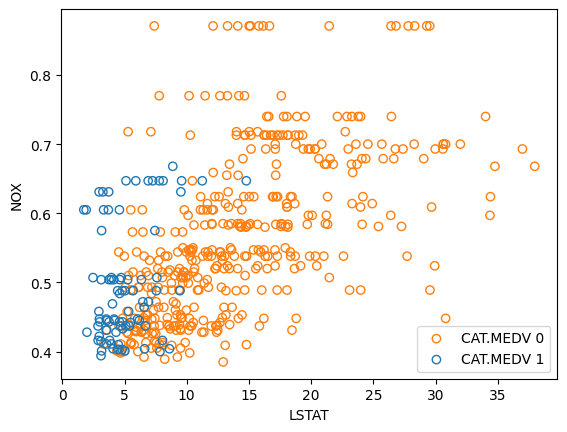

In [64]:
# Plot first the data points for CAT.MEDV of 0 and then of 1
_, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])

plt.show()

## Panel plots

Compute mean MEDV per RAD and CHAS and create two bar charts for each value of RAD

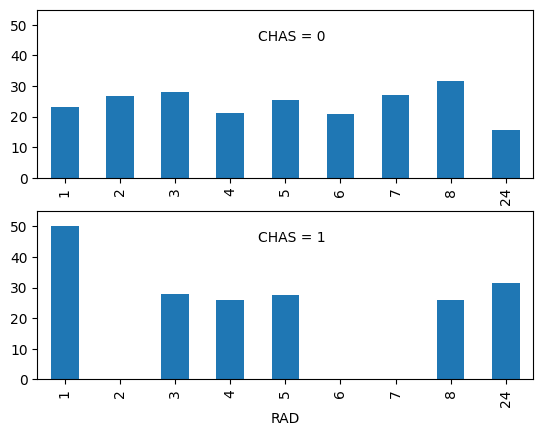

In [65]:
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))

plt.show()

## Figure 3.7
Scatterplot matrix

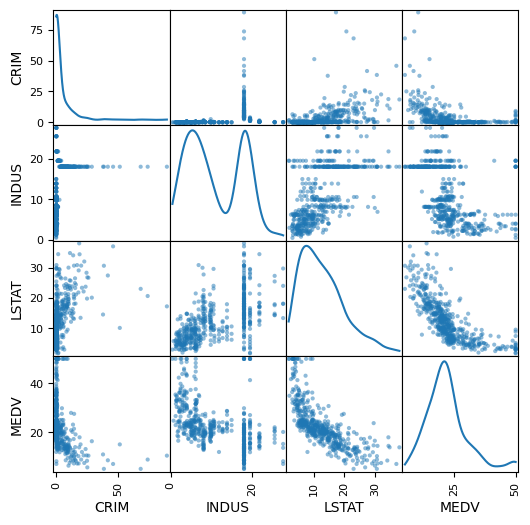

In [66]:
_ = scatter_matrix(housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']], figsize=(6, 6), diagonal='kde')

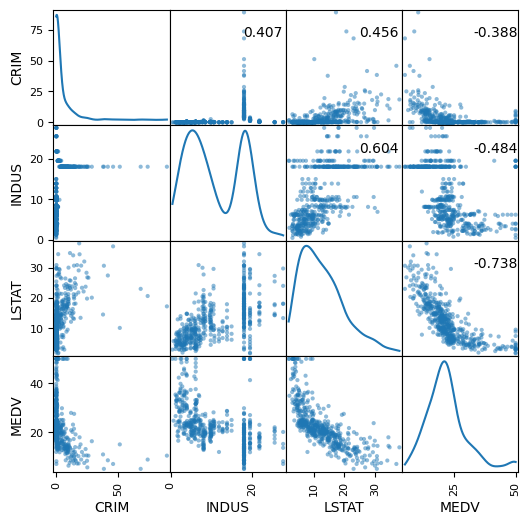

In [67]:
# Add the correlation coefficient to the scatterplots above the diagonal
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

## Figure 3.8

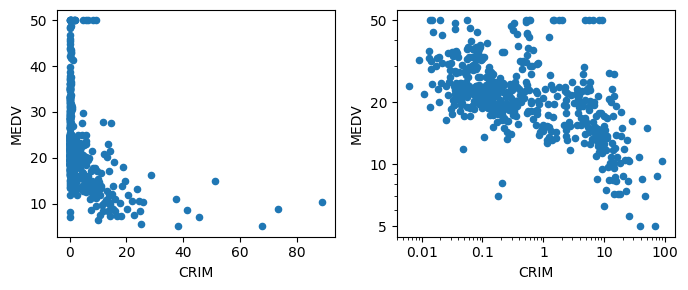

In [68]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

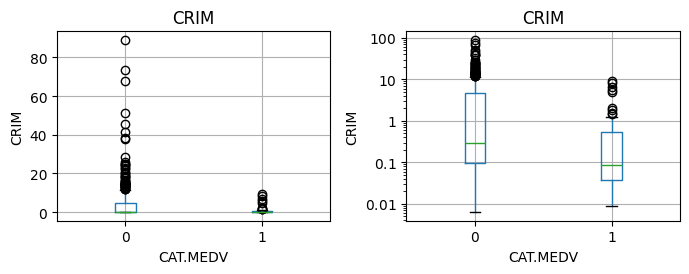

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

## Figure 3.9

<ipython-input-70-9bb2a5cf01a5>:34: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()


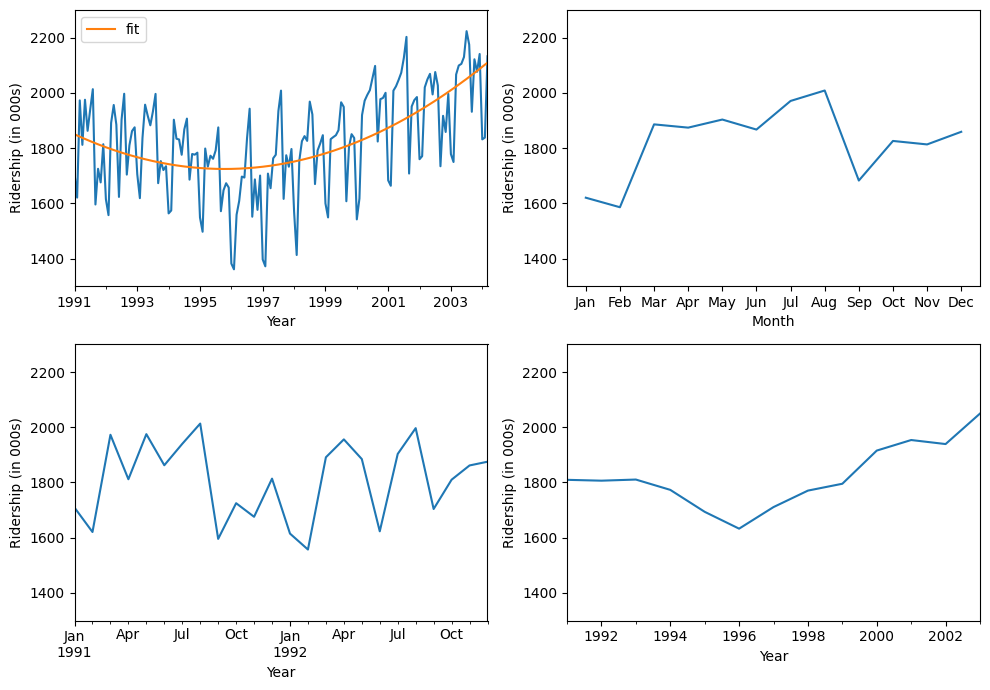

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))


Amtrak_df = dmba.load_data('Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_df.index

ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)]);

# Average by year (exclude data from 2004)
byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()

plt.show()

## Figure 3.10

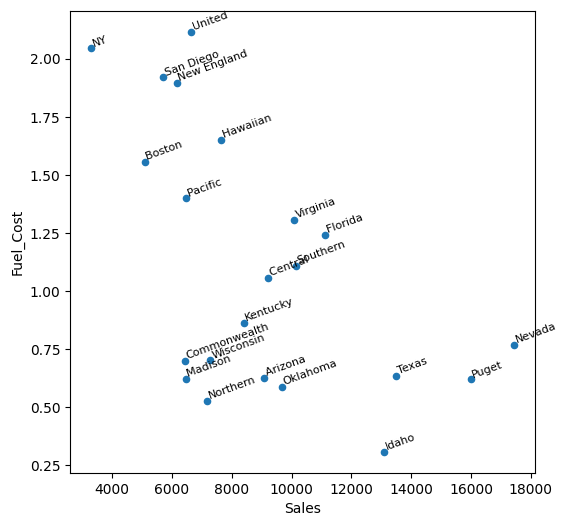

In [71]:
utilities_df = dmba.load_data('Utilities.csv')

ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))
points = utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x:
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

plt.show()

## Figure 3.11
Use `alpha` to add transparent colors

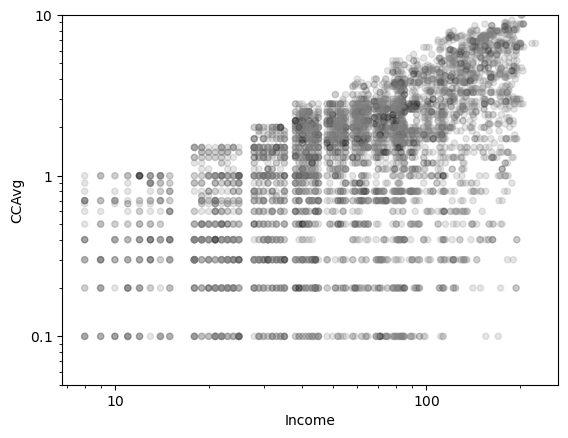

In [72]:
universal_df = dmba.load_data('UniversalBank.csv')

universal_df.plot.scatter(x='Income', y='CCAvg',
                          c=['black' if c == 1 else 'grey' for c in universal_df['Securities Account']],
                          ylim = (0.05, 10), alpha=0.2,
                          logx=True, logy=True)
plt.show()

The pandas plot pandas has a number of problems that can be solved using matplotlib

- overlapping points: add random jitter to the datapoints
- distribution of securities account less obvious due to overplotting: separate plotting of the two sets of accounts

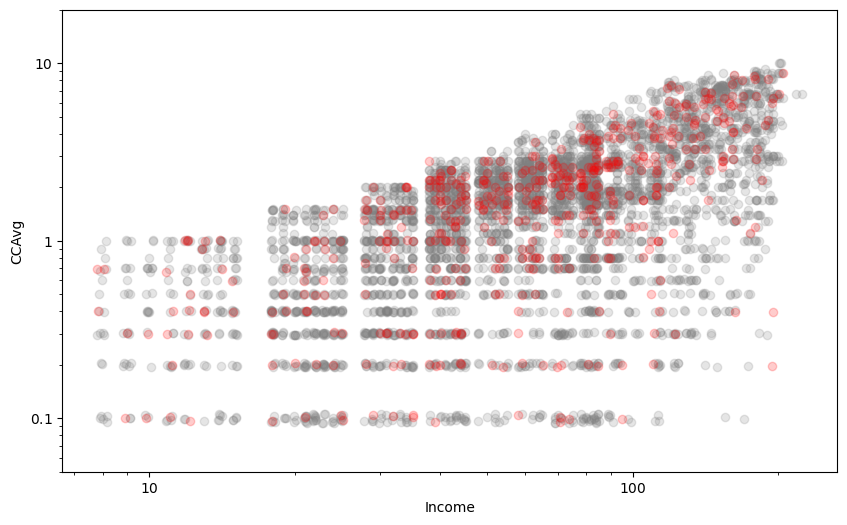

In [73]:
def jitter(x, factor=1):
    """ Add random jitter to x values """
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d > 0)
    a = factor * minDelta / 5
    return x + np.random.uniform(-a, a, len(x))


saIdx = universal_df[universal_df['Securities Account'] == 1].index

plt.figure(figsize=(10,6))
plt.scatter(jitter(universal_df.drop(saIdx).Income),
            jitter(universal_df.drop(saIdx).CCAvg),
            marker='o', color='grey', alpha=0.2)
plt.scatter(jitter(universal_df.loc[saIdx].Income),
            jitter(universal_df.loc[saIdx].CCAvg),
            marker='o', color='red', alpha=0.2)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")

plt.show()

## Figure 3.12

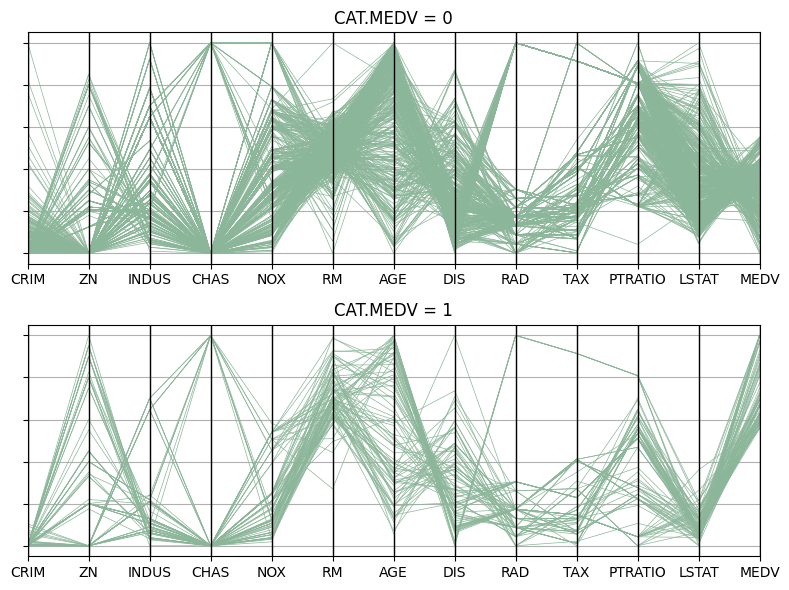

In [74]:
# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns=housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i],
                         'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT.MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()  # Increase the separation between the plots

plt.show()

## Figure 3.14

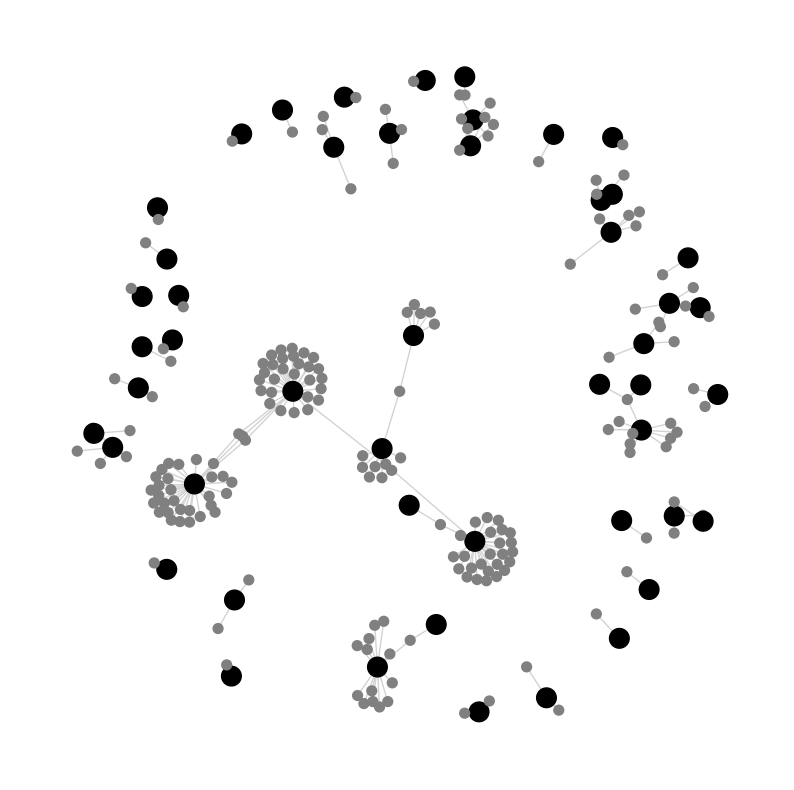

In [75]:
ebay_df = dmba.load_data('eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')

plt.show()

## Figure 3.15
There are currently no packages in Python that provide treemaps of the same quality and flexibility as R.

Use example from here: https://python-graph-gallery.com/treemap/

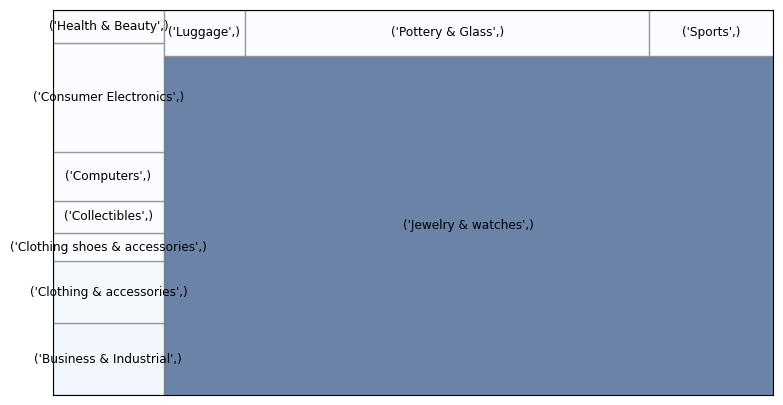

In [76]:
! pip install squarify

import squarify
import matplotlib

ebayTreemap = dmba.load_data('EbayTreemap.csv')

grouped = []
for category, df in ebayTreemap.groupby(['Category']):
    negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean()
    })
byCategory = pd.DataFrame(grouped)

norm = matplotlib.colors.Normalize(vmin=byCategory.negativeFeedback.min(), vmax=byCategory.negativeFeedback.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]

fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

renameCategories = {
    'Business & Industrial': 'Business &\nIndustrial',
    'Health & Beauty': 'Health &\nBeauty',
    'Consumer Electronics': 'Consumer\nElectronics',
    'Clothing & accessories': 'Clothing &\naccessories',
    'Clothing shoes & accessories': 'Clothing shoes &\naccessories'
}
labels = [renameCategories.get(c, c) for c in byCategory.category]

squarify.plot(label=labels, sizes=byCategory.averageBid, color=colors,
              ax=ax, alpha=0.6, edgecolor='grey', text_kwargs={'fontsize': 8.7})

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.subplots_adjust(left=0.1)
plt.show()
# labels

## Figure 3.16
To run this example you need an API key for Google maps. Go to https://cloud.google.com/maps-platform/ to find out how to get one.

In [77]:
if 'GMAPS_API_KEY' in os.environ:
    import gmaps
    SCstudents = dmba.load_data('SC-US-students-GPS-data-2016.csv')

    gmaps.configure(api_key=os.environ['GMAPS_API_KEY'])
    fig = gmaps.figure(center=(39.7, -105), zoom_level=3)
    fig.add_layer(gmaps.symbol_layer(SCstudents, scale=2,
                                     fill_color='red', stroke_color='red'))
    fig

## Figure 3.17
<div class="alert alert-info">If you get an error message on MacOS about a missing library, set the environment variable `DYLD_FALLBACK_LIBRARY_PATH` before starting jupyter notebook.
<br>
```
export DYLD_FALLBACK_LIBRARY_PATH=/usr/local/lib:/lib:/usr/lib
```
</div>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 26.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


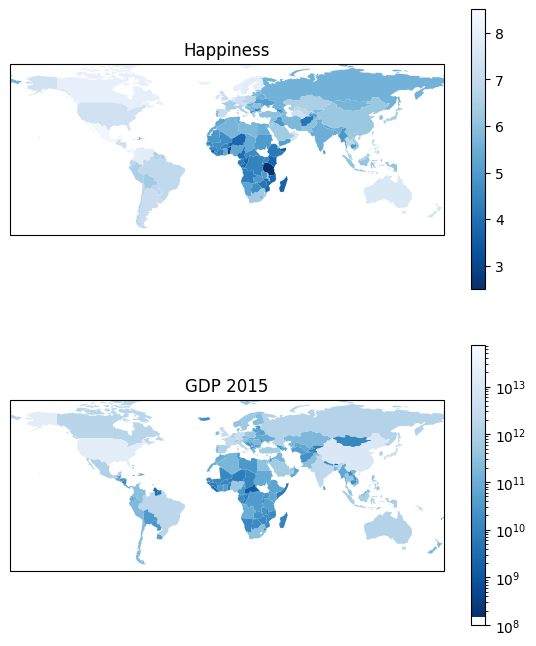

In [80]:
! pip install cartopy

import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

gdp_df = dmba.load_data('gdp.csv', skiprows=4)

gdp_df.rename(columns={'2015': 'GDP2015'}, inplace=True)
gdp_df.set_index('Country Code', inplace=True)  # use the three letter country code to access rows

# The file contains a column with two letter combinations, use na_filter to avoid converting
# the combination NA into not-a-number
happiness_df = dmba.load_data('Veerhoven.csv', na_filter = False)
happiness_df.set_index('Code', inplace=True)  # use the country name to access rows


fig = plt.figure(figsize=(7, 8))

ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-150, 60, -25, 60])

ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-150, 60, -25, 60])

# Create a color mapper
cmap = plt.cm.Blues_r
norm1 = matplotlib.colors.Normalize(vmin=happiness_df.Score.dropna().min(),
                                    vmax=happiness_df.Score.dropna().max())
norm2 = matplotlib.colors.LogNorm(vmin=gdp_df.GDP2015.dropna().min(),
                                  vmax=gdp_df.GDP2015.dropna().max())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    countryCode = country.attributes['ADM0_A3']
    if countryCode in gdp_df.index:
        ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                           facecolor=cmap(norm2(gdp_df.loc[countryCode].GDP2015)))
    # check various attributes to find the matching two-letter combinations
    nation = country.attributes['POSTAL']
    if nation not in happiness_df.index:
        nation = country.attributes['ISO_A2']
    if nation not in happiness_df.index:
        nation = country.attributes['WB_A2']
    if nation not in happiness_df.index and country.attributes['NAME'] == 'Norway':
        nation = 'NO'
    if nation in happiness_df.index:
        ax1.add_geometries([country.geometry], ccrs.PlateCarree(),
                           facecolor=cmap(norm1(happiness_df.loc[nation].Score)))

ax2.set_title("GDP 2015")
sm = plt.cm.ScalarMappable(norm=norm2, cmap=cmap)
sm._A = []
cb = plt.colorbar(sm, ax=ax2)
cb.set_ticks([1e8, 1e9, 1e10, 1e11, 1e12, 1e13])

ax1.set_title("Happiness")
sm = plt.cm.ScalarMappable(norm=norm1, cmap=cmap)
sm._A = []
cb = plt.colorbar(sm, ax=ax1)
cb.set_ticks([3, 4, 5, 6, 7, 8])


plt.show()